# Project Title: Diabetes Treatment Outcome - HbA1c Level Analysis Using Sampling Distributions

### Objective: The goal of this project is to estimate the average `HbA1c level` for diabetes patients and evaluate the effectiveness of treatment plans in lowering blood sugar levels. We will use `sampling distributions` to generalize the findings from a sample of patients to the larger population.

## Import Required Libraries:

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load and Display Datasets:

In [158]:
# Load the two datasets
treatments = pd.read_csv("treatments.csv")
treatments_cut = pd.read_csv("treatments_cut.csv")

# Display first few rows of each dataset
print(treatments.head())
print(treatments_cut.head())

  given_name     surname   auralin   novodra  hba1c_start  hba1c_end  \
0   veronika    jindrová  41u  48u       NaN         7.63       7.20   
1     elliot  richardson       NaN  40u  45u         7.56       7.09   
2   yukitaka    takenaka       NaN  39u  36u         7.68       7.25   
3       skye  gormanston  33u  36u       NaN         7.97       7.62   
4     alissa      montez       NaN  33u  29u         7.78       7.46   

   hba1c_change  
0           NaN  
1          0.97  
2           NaN  
3          0.35  
4          0.32  
  given_name    surname   auralin   novodra  hba1c_start  hba1c_end  \
0      jožka  resanovič  22u  30u       NaN         7.56       7.22   
1  inunnguaq   heilmann  57u  67u       NaN         7.85       7.45   
2      alwin   svensson  36u  39u       NaN         7.78       7.34   
3        thể      lương       NaN  61u  64u         7.64       7.22   
4     amanda    ribeiro  36u  44u       NaN         7.85       7.47   

   hba1c_change  
0          0.3

## Combine the Datasets:

In [159]:
# Combine the two datasets
treatments_all = pd.concat([treatments, treatments_cut], axis=0, ignore_index=True)

# Display first few rows of the combined dataset
print(treatments_all.head())

  given_name     surname   auralin   novodra  hba1c_start  hba1c_end  \
0   veronika    jindrová  41u  48u       NaN         7.63       7.20   
1     elliot  richardson       NaN  40u  45u         7.56       7.09   
2   yukitaka    takenaka       NaN  39u  36u         7.68       7.25   
3       skye  gormanston  33u  36u       NaN         7.97       7.62   
4     alissa      montez       NaN  33u  29u         7.78       7.46   

   hba1c_change  
0           NaN  
1          0.97  
2           NaN  
3          0.35  
4          0.32  


# Data Assessment:

### Total Number of Rows:

In [160]:
print(len(treatments_all))

350


### Data Types and Column Information:

In [161]:
print(treatments_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    350 non-null    object 
 1   surname       350 non-null    object 
 2   auralin       175 non-null    object 
 3   novodra       175 non-null    object 
 4   hba1c_start   350 non-null    float64
 5   hba1c_end     350 non-null    float64
 6   hba1c_change  213 non-null    float64
dtypes: float64(3), object(4)
memory usage: 19.3+ KB
None


### Column Names:

In [165]:
print(list(treatments_all.columns))

['given_name', 'surname', 'auralin', 'novodra', 'hba1c_start', 'hba1c_end', 'hba1c_change']


### Missing Values:

In [166]:
print(treatments_all.isnull().sum())

given_name        0
surname           0
auralin         175
novodra         175
hba1c_start       0
hba1c_end         0
hba1c_change    137
dtype: int64


# Data Cleaning:

### Filling Missing Values:

In [177]:
# Fill missing values with 'Unknown'
df = treatments_all.fillna('Unknown')

# Display first few rows after filling missing values
print(df.head())

# Check for missing values again
print(df.isnull().sum())

  given_name     surname   auralin   novodra  hba1c_start  hba1c_end  \
0   veronika    jindrová  41u  48u   Unknown         7.63       7.20   
1     elliot  richardson   Unknown  40u  45u         7.56       7.09   
2   yukitaka    takenaka   Unknown  39u  36u         7.68       7.25   
3       skye  gormanston  33u  36u   Unknown         7.97       7.62   
4     alissa      montez   Unknown  33u  29u         7.78       7.46   

  hba1c_change  
0      Unknown  
1         0.97  
2      Unknown  
3         0.35  
4         0.32  
given_name      0
surname         0
auralin         0
novodra         0
hba1c_start     0
hba1c_end       0
hba1c_change    0
dtype: int64


# Data Analysis

## Sampling HbA1c Data:

## We will randomly sample 30 patients to estimate the average change in HbA1c levels.

In [180]:
# Take a random sample of 30 patients
sample = df.sample(n=30, random_state=42)

# Convert the 'hba1c_change' column to numeric, coercing errors
df['hba1c_change'] = pd.to_numeric(df['hba1c_change'], errors='coerce')

# Calculate Mean and STANDARD DEVIATION for the sample
mean_sample = sample['hba1c_change'].mean()
std_sample = sample['hba1c_change'].std()

print(f'Mean HbA1c Change (Sample): {mean_sample}')
print(f'Standard Deviation of HbA1c Change (Sample): {std_sample}')

Mean HbA1c Change (Sample): 0.5964999999999999
Standard Deviation of HbA1c Change (Sample): 0.2871873586134467


# Build the Sampling Distribution:

#### Multiple random samples from the dataset, calculate the mean `HbA1c change` for each sample, and store these means to build the sampling distribution:

In [171]:
# Number of samples to take
samp_size = 1000
sample_means = []

# Build the sampling distribution
for i in range(samp_size):
    random_sample = df['hba1c_change'].sample(n=30, replace=False)
    sample_means.append(random_sample.mean())

# Convert to a numpy array
sample_means = np.array(sample_means)

# Visualize the Sampling Distribution:

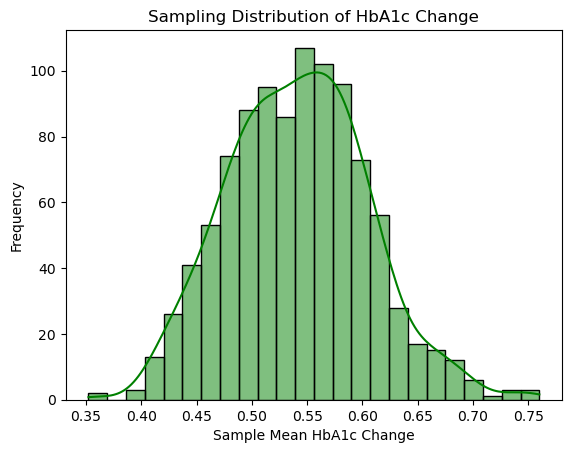

In [172]:
# Plot the sampling distribution
sns.histplot(sample_means, kde=True, color='green')
plt.title('Sampling Distribution of HbA1c Change')
plt.xlabel('Sample Mean HbA1c Change')
plt.ylabel('Frequency')
plt.show()

# Analyze the Sampling Distribution:

#### Estimate the overall average change in HbA1c levels across all patients by analyzing the sampling distribution.

In [173]:
# Calculate MEAN and STANDARD DEVIATION of the sampling distribution
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

# Print the results
print(f'Estimated Mean HbA1c Change: {mean_of_sample_means}')
print(f'Standard Error: {std_of_sample_means}')

Estimated Mean HbA1c Change: 0.541446146546045
Standard Error: 0.06329395459924915


# Calculate Confidence Intervals:

### A 95% confidence interval will provide a range within which the true mean HbA1c change lies.

In [174]:
# 95% Confidence Interval
confidence_level = 0.95
ci = stats.t.interval(confidence_level, df=len(sample_means)-1, loc=mean_of_sample_means, scale=std_of_sample_means)

# Print confidence interval
print(f'95% Confidence Interval for HbA1c Change: {ci[0]} to {ci[1]}')

95% Confidence Interval for HbA1c Change: 0.41724179519684024 to 0.6656504978952497


# Results Summary:

### Mean HbA1c Change (Sample): 0.5965
### Standard Deviation of HbA1c Change (Sample): 0.2872
### Estimated Mean HbA1c Change (Population): 0.5414
### Standard Error: 0.06329
### 95% Confidence Interval for HbA1c Change: 0.4172 to 0.6656

# Summary:

### This project successfully demonstrates how sampling distributions can be applied to generalize findings from a sample to a population in a medical context, specifically evaluating the effectiveness of diabetes treatments by monitoring HbA1c changes.